---
title: Dimensionality Reduction
jupyter: python3
author: "Grace Hyland"
format:
  html:
    code-fold: true
editor: visual
---

# Project Proposal

In following steps in this project, I will be creating clustering models and decision trees. Before doing this I aim to reduce the dimensions of the data frame from the eight features I have been using thus far, to a smaller number that facilitates better visualization and allows for quicker and easier computation while still maintaining enough predictive power. 

I will be implementing both Principal Component Analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE). To do this, I will use PCA from sklearn.decomposition and TSNE from sklearn.manifold in Python.

# Code Implementation and Project Report

## Dimensionality Reduction with PCA

To start, I reduced the dimensions using PCA. I first had to import the necessary libraries and load in the data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df=pd.read_csv("../data/01-modified-data/team_pp_data_clean.csv")
label = df['playoff'].copy()
df=df.drop(columns=['Unnamed: 0','playoff'])


I initially carried out PCA with reduction to three components and applied it to the data frame. I added the newly created variables to a data frame with column names and printed the head of the data frame to visualize.

In [2]:
pca=PCA(n_components=3)
pca.fit(df)
print(pca.components_)
data_pca=pca.transform(df)
data_pca=pd.DataFrame(data_pca,columns=['A','B','C'])
data_pca.head()

[[ 0.01540233  0.00178136  0.2858614   0.33675383  0.23802378  0.67930777
   0.39066758  0.36592922]
 [ 0.00996335  0.00628949  0.28774976  0.56100297  0.35014151 -0.64675638
   0.24591146 -0.03117027]
 [-0.04444102 -0.02736794 -0.0379361  -0.30857632  0.04736612 -0.31303529
  -0.02653487  0.89424759]]


,A,B,C
0,0.866603,-0.243610,0.167068
1,1.115348,0.319936,-0.316053
2,0.066727,-0.098512,-0.101846
3,-0.373166,0.101799,-0.174254
4,1.504929,-0.260650,0.340209


After performing PCA with three components, I created a graph of cumulative proportion of variance explained against the number of components ranging from 1 to 8 to see the lowest number of components that can still explain most of the variance in the data.

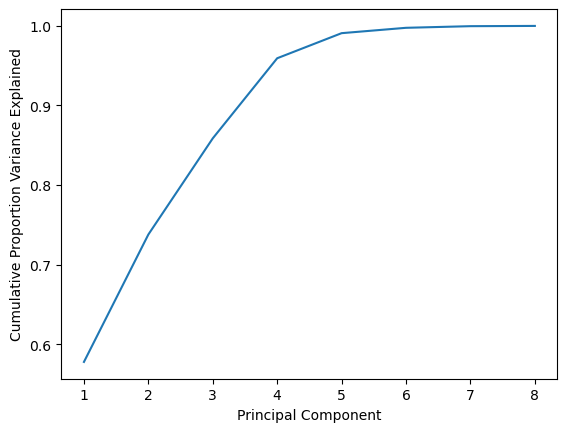

In [3]:
pca=PCA()
pca.fit(df)
exp_variance=np.cumsum(pca.explained_variance_ratio_)
components=[1,2,3,4,5,6,7,8]


plt.plot(components,exp_variance)
plt.ylabel('Cumulative Proportion Variance Explained')
plt.xlabel('Principal Component')
plt.show()


Based on the graph, going beyond four principal components does not result in a huge increase in the amount of the variance that is explained by the components. Therefore, I reduced the feature data to four components.

In [4]:
pca=PCA(n_components=4)
pca.fit(df)
print(pca.components_)
data_pca1=pca.transform(df)
data_pca1=pd.DataFrame(data_pca1,columns=['A','B','C','D'])

[[ 0.01540233  0.00178136  0.2858614   0.33675383  0.23802378  0.67930777
   0.39066758  0.36592922]
 [ 0.00996335  0.00628949  0.28774976  0.56100297  0.35014151 -0.64675638
   0.24591146 -0.03117027]
 [-0.04444102 -0.02736794 -0.0379361  -0.30857632  0.04736612 -0.31303529
  -0.02653487  0.89424759]
 [-0.04554206 -0.04209536 -0.20350721 -0.33429325 -0.161209   -0.12598362
   0.8845323  -0.13685446]]


I reduced the dimensions of the data to four components and created a new data frame with the four components labeled a A, B, C, D.

To visualize the components, I plotted each pair of the four features against each other in scatterplots shown below.

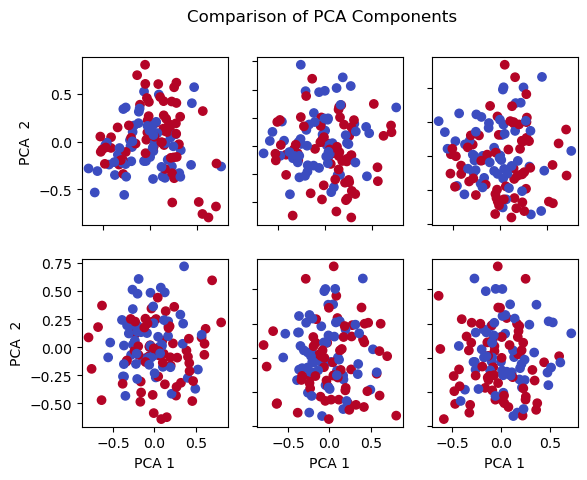

In [17]:
pca_adj_df=data_pca1
pca_adj_df['playoff']=label
pca_adj_df.replace(('Y', 'N'), (1, 0), inplace=True)

fig, axs=plt.subplots(2,3)

axs[0,0].scatter(pca_adj_df['A'], pca_adj_df['B'], c=pca_adj_df['playoff'], cmap='coolwarm')

axs[0,1].scatter(pca_adj_df['A'], pca_adj_df['C'], c=pca_adj_df['playoff'], cmap='coolwarm')

axs[0,2].scatter(pca_adj_df['A'], pca_adj_df['D'], c=pca_adj_df['playoff'], cmap='coolwarm')

axs[1,0].scatter(pca_adj_df['B'], pca_adj_df['C'], c=pca_adj_df['playoff'], cmap='coolwarm')

axs[1,1].scatter(pca_adj_df['B'], pca_adj_df['D'], c=pca_adj_df['playoff'], cmap='coolwarm')

axs[1,2].scatter(pca_adj_df['C'], pca_adj_df['D'], c=pca_adj_df['playoff'], cmap='coolwarm')
for ax in axs.flat:
    ax.set(xlabel='PCA 1', ylabel='PCA  2')
for ax in axs.flat:
    ax.label_outer()
fig.suptitle('Comparison of PCA Components')
plt.show()

All of the features plot against each other do show a significant amount of variance between each other which is what we are looking for with dimensionality reduction.

## Dimensionality Reduction with t-SNE
I next applied dimensionality reduction with t-SNE on the same data set. I used the standard number of components of two and varied the perplexity.

Graphs of the dimensionality reduction with different perplexities as well as the shape of the data set formed and the first few points are shown below.

perplexity: 3
shape:  (126, 2)
First few points: 
 [[-48.405277   11.784265 ]
 [-25.97799   -19.775352 ]
 [ -2.8351245  15.392918 ]
 [ 38.675873   -7.1923904]]
---------------------
perplexity: 15
shape:  (126, 2)
First few points: 
 [[-22.509907    -2.7635748 ]
 [-14.06056     -9.908393  ]
 [ -4.9173107   -0.06018139]
 [ 11.1908245    9.006622  ]]
---------------------
perplexity: 30
shape:  (126, 2)
First few points: 
 [[-8.927938    3.6503627 ]
 [-5.711835    5.5288625 ]
 [-0.60401803  1.1408626 ]
 [ 4.474953   -1.2845267 ]]
---------------------
perplexity: 45
shape:  (126, 2)
First few points: 
 [[ 2.1755915  3.0193036]
 [ 4.661678   0.5690624]
 [ 0.3941788 -1.819139 ]
 [-1.975171  -3.0735848]]
---------------------


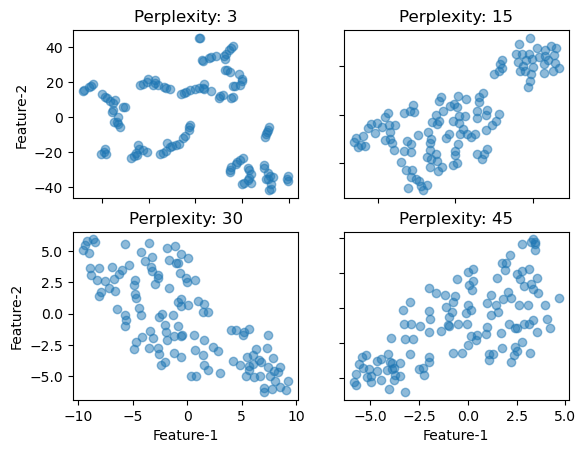

In [10]:
from sklearn.manifold import TSNE
df1_embedded=TSNE(n_components=2,learning_rate='auto',init='random',perplexity=3).fit_transform(df)
print("perplexity: 3")
print("shape: ",df1_embedded.shape)
print("First few points: \n",df1_embedded[0:4,:])
print("---------------------")

df2_embedded=TSNE(n_components=2,learning_rate='auto',init='random',perplexity=15).fit_transform(df)
print("perplexity: 15")
print("shape: ",df2_embedded.shape)
print("First few points: \n",df2_embedded[0:4,:])
print("---------------------")

df3_embedded=TSNE(n_components=2,learning_rate='auto',init='random',perplexity=30).fit_transform(df)
print("perplexity: 30")
print("shape: ",df3_embedded.shape)
print("First few points: \n",df3_embedded[0:4,:])
print("---------------------")

df4_embedded=TSNE(n_components=2,learning_rate='auto',init='random',perplexity=45).fit_transform(df)
print("perplexity: 45")
print("shape: ",df4_embedded.shape)
print("First few points: \n",df4_embedded[0:4,:])
print("---------------------")



fig, axs = plt.subplots(2, 2)
axs[0,0].scatter(df1_embedded[:,0],df1_embedded[:,1],alpha=0.5)
axs[0, 0].set_title('Perplexity: 3')
axs[0,1].scatter(df2_embedded[:,0],df2_embedded[:,1],alpha=0.5)
axs[0, 1].set_title('Perplexity: 15')
axs[1,0].scatter(df3_embedded[:,0],df3_embedded[:,1],alpha=0.5)
axs[1, 0].set_title('Perplexity: 30')
axs[1,1].scatter(df4_embedded[:,0],df4_embedded[:,1],alpha=0.5)
axs[1, 1].set_title('Perplexity: 45')
for ax in axs.flat:
    ax.set(xlabel='Feature-1', ylabel='Feature-2')
for ax in axs.flat:
    ax.label_outer()
plt.show()


The lower perplexity values of 3 and 15 show the data forming more distinct clusters together. The perplexity three graph has many small clusters while the perplexity 15 graph appears to have two clear separate groups in the data. The higher perplexity values of 30 and 45 show more even distributions of the data.

The optimal perplexity to use when reducing the dimensions of this data set is likely around 15, because we want the differences in the data to be maintained.

## Evaluation and Comparison

tSNE and PCA are two different ways of performing dimensionality reduction on a dataset with many features. Using PCA, we can select based on graphs the optimal number of features that the larger dataset should be reduced to and then carry out that reduction. In the case of this data, the optimal number of features to reduce to using PCA was 4. Using t-SNE, typically you are always reducing the two features. Reducing to two features as I did in t-SNE results in simpler visualizations of the distribution of the two features because it can be plotted on a simple 2 dimensional plane unlike the 4 feautures from PCA which had to be plotted against each other in different combinations across multiple plots.

## References

DSAN 5000 Lecture Content (Hickman 2023)